# 2. 데이터 전처리

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- 데이터 요약

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 데이터 정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- 문제: 처음부터 800번 까지의 데이터를 학습 데이터로 이용하고, 나머지 데이터를 학습 데이터로 이용하여 모델간의 결과를 비교하여라.

In [8]:
train_df = df[:800]
test_df = df[800:]

In [9]:
print(len(train_df))
print(len(test_df))

800
91


- pclass와 survived의 관계(관계 있음)

In [11]:
train_df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.615385
1,2,0.481928
2,3,0.246014


- sex와 survived의 관계(관계 있음)

In [12]:
train_df[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.745583
1,male,0.187621


- parch 와 survived의 관계(관계가 적음)

In [13]:
train_df[['parch', 'survived']].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
2,2,0.527778
1,1,0.514851
3,3,0.500000
0,0,0.350163
5,5,0.250000
4,4,0.000000
6,6,0.000000


- sibsp와 survived와의 관계(관계가 적음)

In [15]:
train_df[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1,0.518325
2,2,0.481481
0,0,0.348708
3,3,0.266667
4,4,0.200000
5,5,0.000000
6,8,0.000000


- age와 survived의 관계

<AxesSubplot:xlabel='age', ylabel='Count'>

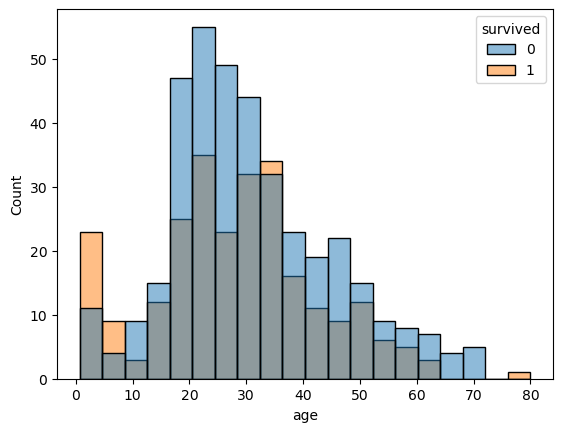

In [16]:
sns.histplot(data=train_df, x = 'age', bins=20, hue='survived')

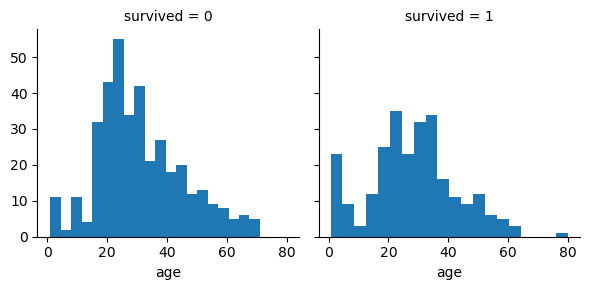

In [18]:
a = sns.FacetGrid(train_df, col='survived')
a.map(plt.hist, 'age', bins=20)

- pclass에 따른 age 별 survived 유무

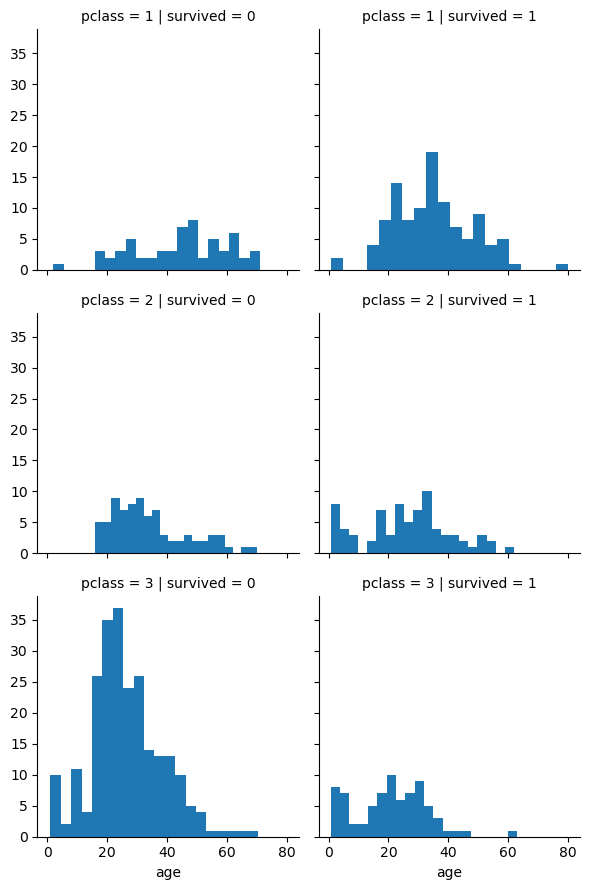

In [19]:
a = sns.FacetGrid(train_df, col='survived', row='pclass')
a.map(plt.hist, 'age', bins=20)

- 필요 없는 필드 삭제

In [20]:
names = train_df.columns
print(names)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [21]:
train_df = train_df.drop(names[4:], axis=1)

In [23]:
test_df = test_df.drop(names[4:], axis=1)

In [22]:
train_df.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [24]:
test_df.head()

,survived,pclass,sex,age
800,0,2,male,34.00
801,1,2,female,31.00
802,1,1,male,11.00
803,1,3,male,0.42
804,1,3,male,27.00


- 결측값 확인

In [25]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

survived      0
pclass        0
sex           0
age         163
dtype: int64
survived     0
pclass       0
sex          0
age         14
dtype: int64
